# Regularization path of L1- Logistic Regression 


In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X=iris.data
y= iris.target

In [3]:
# 只做target0，1的分类
X=X[y!=2]
y=y[y!=2]
X /= X.max()

`warm_start=True` model will reuse last solutions(coef) as initial value.
`intercept_scaling=10000.0`： adjust the regularization impact on the bias. The larger is scaling factor, the less is impact.

In [40]:
import numpy as np
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    tol=1e-6,
    max_iter=100000,
    warm_start=True,
    intercept_scaling=10000.0
)


**l1_min_c 计算给定(X,Y,损失函数)的最小 正则化强度参数C。**
- 返回值表示，恰好能够让所有特征系数不为0的最小值。  即小于返回值C，所有权重系数都为0，模型失效。 大于返回值，至少有一个特征系数非0

✅计算原理


In [66]:
from sklearn.svm import l1_min_c 
min_c = l1_min_c(X,y,loss='log') 
cs = min_c* np.logspace(0,10,16)

In [67]:
print(cs.min(), cs.max(),min_c)

0.10007147962830593 1000714796.2830592 0.10007147962830593


Set some `C`

In [68]:
coefs_=[]
for c in cs:
    clf.set_params(C=c)
    clf.fit(X,y)
    coefs_.append(clf.coef_.ravel())

In [69]:
coefs_[0]

array([0., 0., 0., 0.])

In [70]:
print(X.shape, y.shape)

(100, 4) (100,)


In [71]:
print(len(cs), len(coefs_))

16 16


In [72]:
cs.max()

np.float64(1000714796.2830592)

In [73]:
cs.min()

np.float64(0.10007147962830593)

Text(0.5, 1.0, 'Logistic Regression Path. (coef with C)(min_c:0.10)')

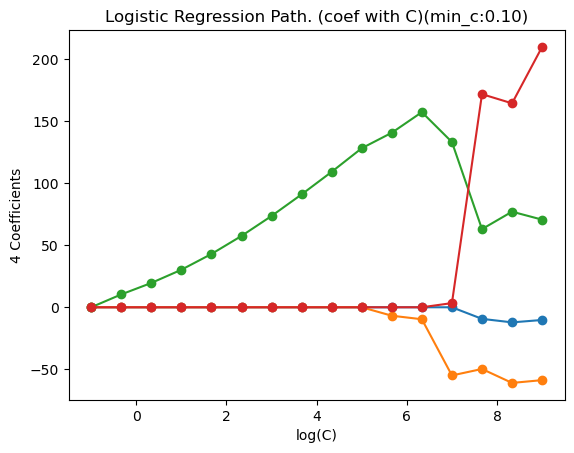

In [76]:
import matplotlib.pyplot as plt
plt.plot(np.log10(cs), coefs_, marker='o')
plt.xlabel("log(C)")
plt.ylabel('4 Coefficients')
plt.title(f'Logistic Regression Path. (coef with C)(min_c:{min_c:.2f})')